# Intermarket Comparison


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import pickle

pd.set_option("display.max_columns", None)

In [2]:
from scripts.params import get_params
from scripts.aux_functions import subset_of_columns, clean_modelname, plot_residuals

params = get_params()

In [3]:
datasets={}
for tablename in ["AR_^MERV", "BR_^BVSP", "MX_^MXX"]:
    filename = os.path.join("..", "data", tablename, f'finaldf_test_{tablename}.pickle')
    with open(filename, "rb") as handle:
        df_test = pickle.load(handle)
        
    df_test.index=pd.to_datetime(df_test.index.copy())
    datasets[tablename] = df_test
    del df_test

In [4]:
forecasts={}
residuals={}
for tablename in ["AR_^MERV", "BR_^BVSP", "MX_^MXX"]:
    for dictionary, picklename in [(forecasts, "forecasts_by_stock_"), (residuals, "residuals_by_stock_")]:
        filename = os.path.join("..", "results", tablename, f'{picklename}{tablename}.pickle')
        with open(filename, "rb") as handle:
            by_stock = pickle.load(handle)
        dictionary[tablename] = by_stock
        del by_stock

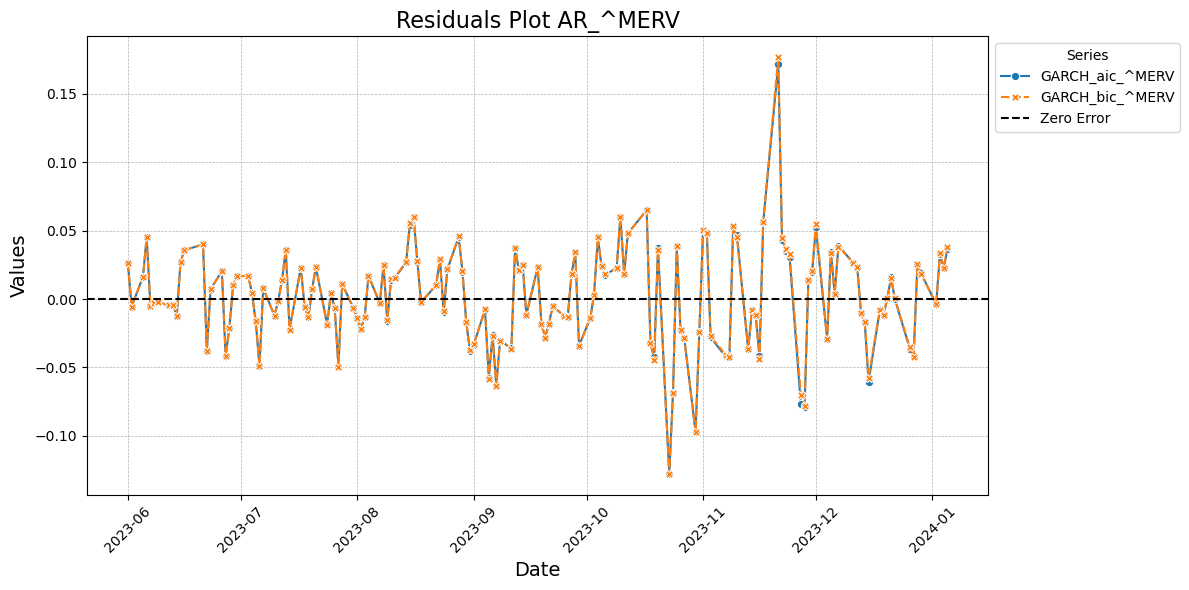

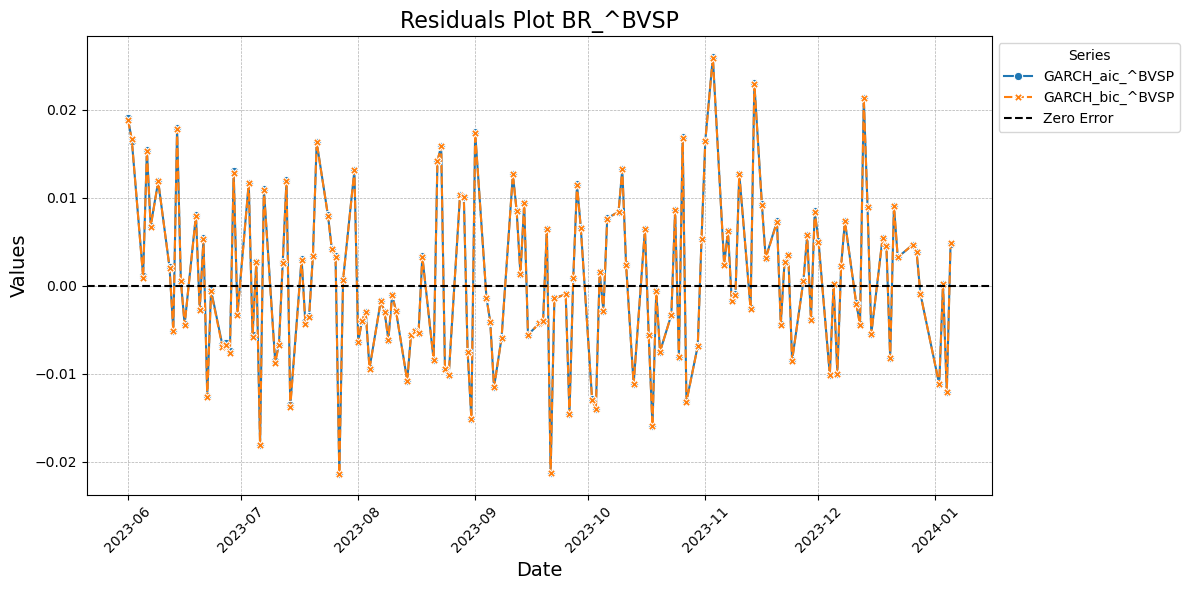

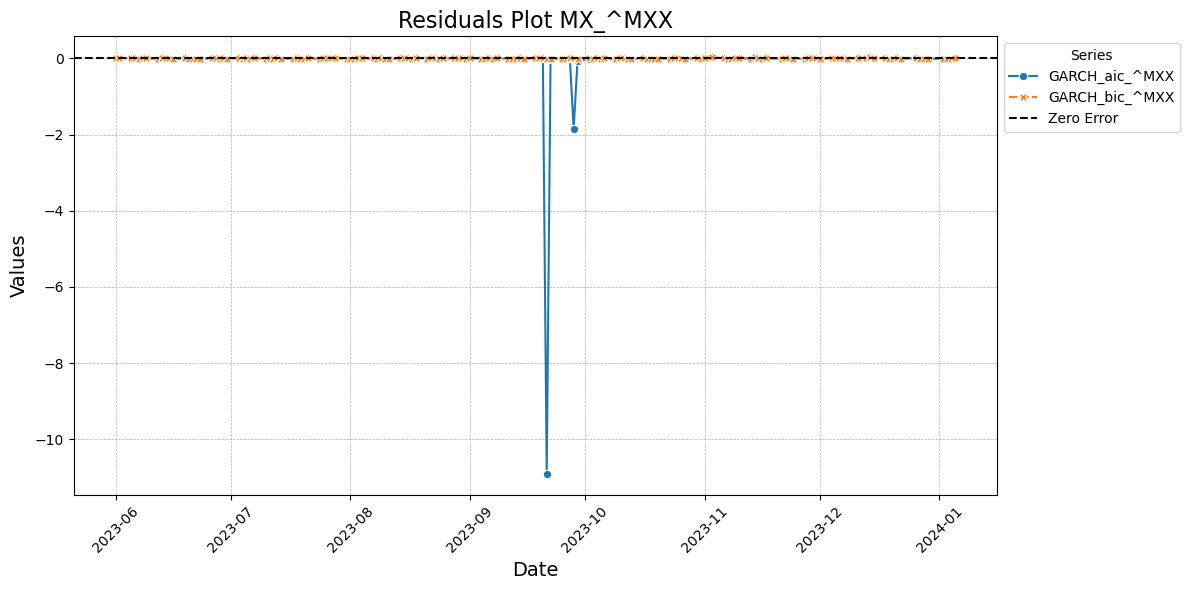

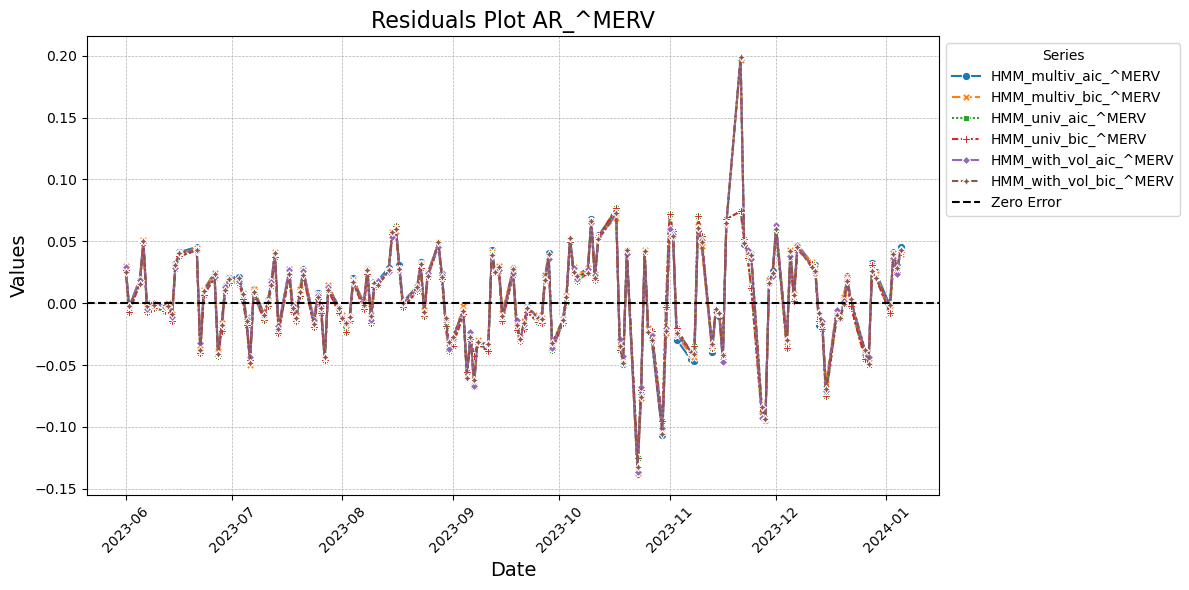

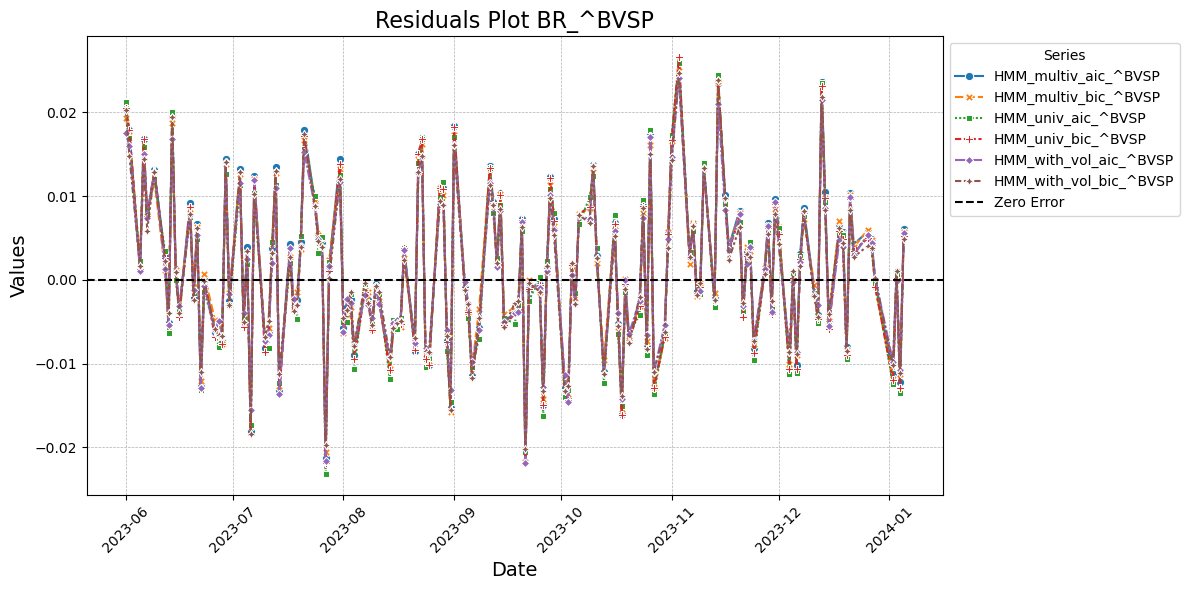

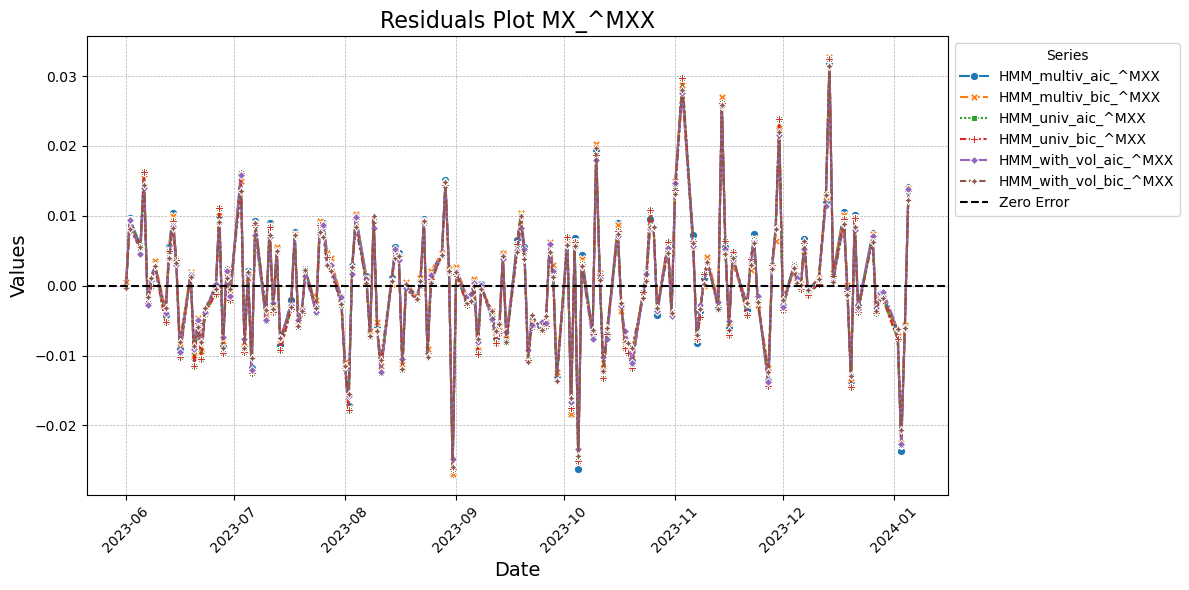

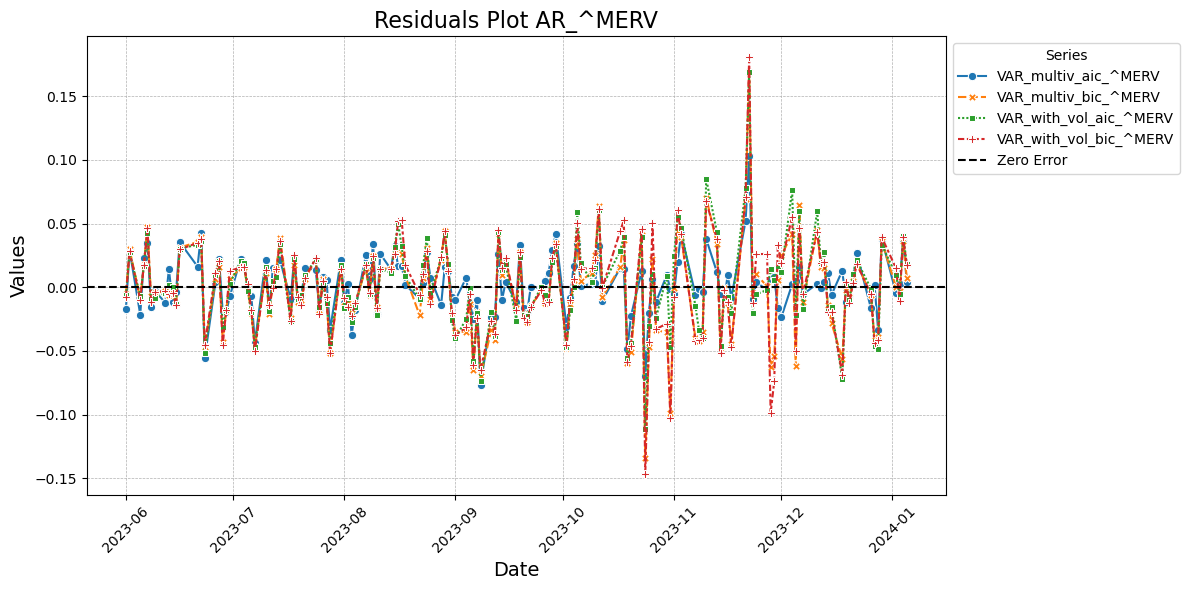

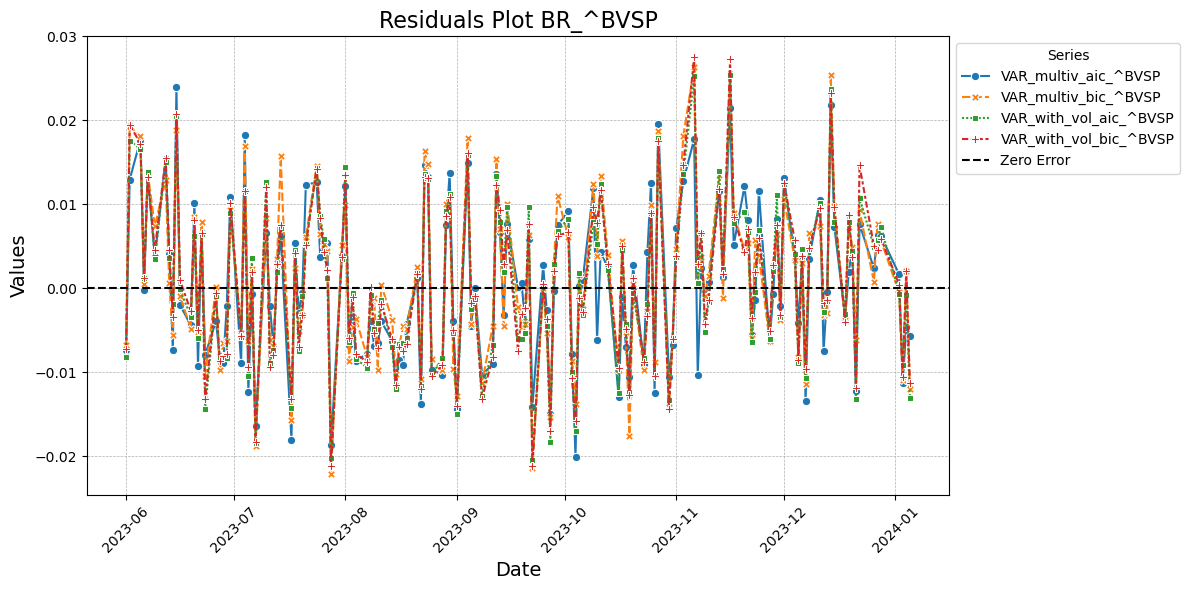

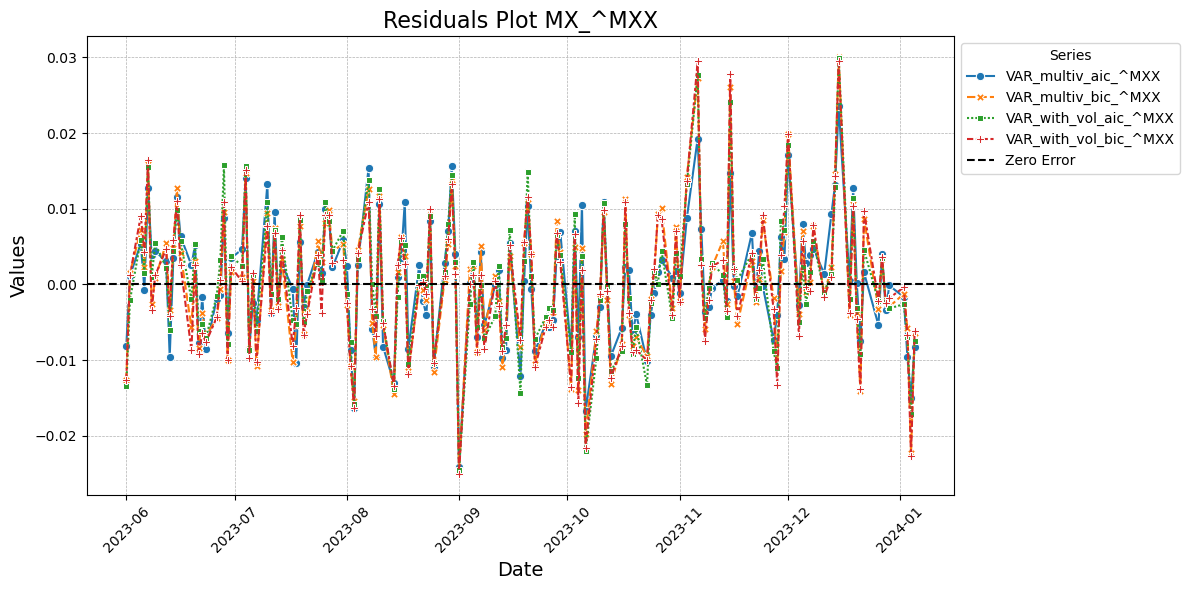

In [10]:
for col in ["GARCH", "HMM", "VAR"]:
    for tablename, asset in [("AR_^MERV", "^MERV"), ("BR_^BVSP","^BVSP"), ("MX_^MXX", "^MXX")]:
        
        resdf = subset_of_columns(residuals[tablename][asset], col)
        fig = plot_residuals(resdf, tablename, show=False, return_fig=True)

In [20]:
def plot_residuals(df, stock, show=True, return_fig=False, ax=None):
  """
  Plots the residuals for a given stock on a specified axis.

  Args:
      df (pandas.DataFrame): The dataframe containing the data.
      stock (str): The name of the stock.
      show (bool, optional): Whether to display the plot directly. Defaults to True.
      return_fig (bool, optional): Whether to return the figure object. Defaults to False.
      ax (matplotlib.axes._axes.Axes, optional): The axis to plot on. Defaults to None.

  Returns:
      plt.Figure (optional): The figure object containing the plot (if return_fig is True).
  """

  if ax is None:  # Create figure and axis if ax is not provided
    fig, ax = plt.subplots(figsize=(12, 6))
  else:
    fig = None  # Avoid creating a new figure if ax is provided

  sb.lineplot(data=df, markers=True, ax=ax)  # Plot residuals on the axis

  # Add title, labels, and formatting
  plt.title(f"Residuals - {stock}", fontsize=14)
  plt.xlabel("Date", fontsize=12)
  plt.ylabel("Values", fontsize=12)
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
  plt.grid(True, linestyle="--", linewidth=0.5)
  plt.axhline(y=0, color="black", linestyle="--", linewidth=1.5, label="Zero Error")

  handles, labels = ax.get_legend_handles_labels()
  ax.legend(handles, labels, title="Series", loc="upper left", bbox_to_anchor=(1, 1))

  plt.tight_layout()

  # Handle show and return options
  if show:
    plt.show()  # Display the plot
  if return_fig:
    return fig  # Return the figure object (if created)


In [21]:
def create_residual_grid(residuals):
  """
  Creates a 3x3 grid of residual plots for different models and assets.

  Args:
      residuals (dict): A dictionary containing residual dataframes for different models and assets.

  Returns:
      plt.Figure: The figure object containing the 3x3 grid of plots.
  """

  fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Create 3x3 grid figure

  # Iterate through models and assets
  row = 0
  col = 0
  for col_name in ["GARCH", "HMM", "VAR"]:
    for tablename, asset in [("AR_^MERV", "^MERV"), ("BR_^BVSP","^BVSP"), ("MX_^MXX", "^MXX")]:
      resdf = subset_of_columns(residuals[tablename][asset], col_name)
      plot_residuals(resdf, tablename, show=False, return_fig=fig, ax=axes[row, col])
      col += 1
      if col == 3:
        col = 0
        row += 1

  # Adjust layout and add a common title (optional)
  fig.suptitle("Residual Plots - Different Models and Assets", fontsize=16)
  plt.tight_layout()
  return fig

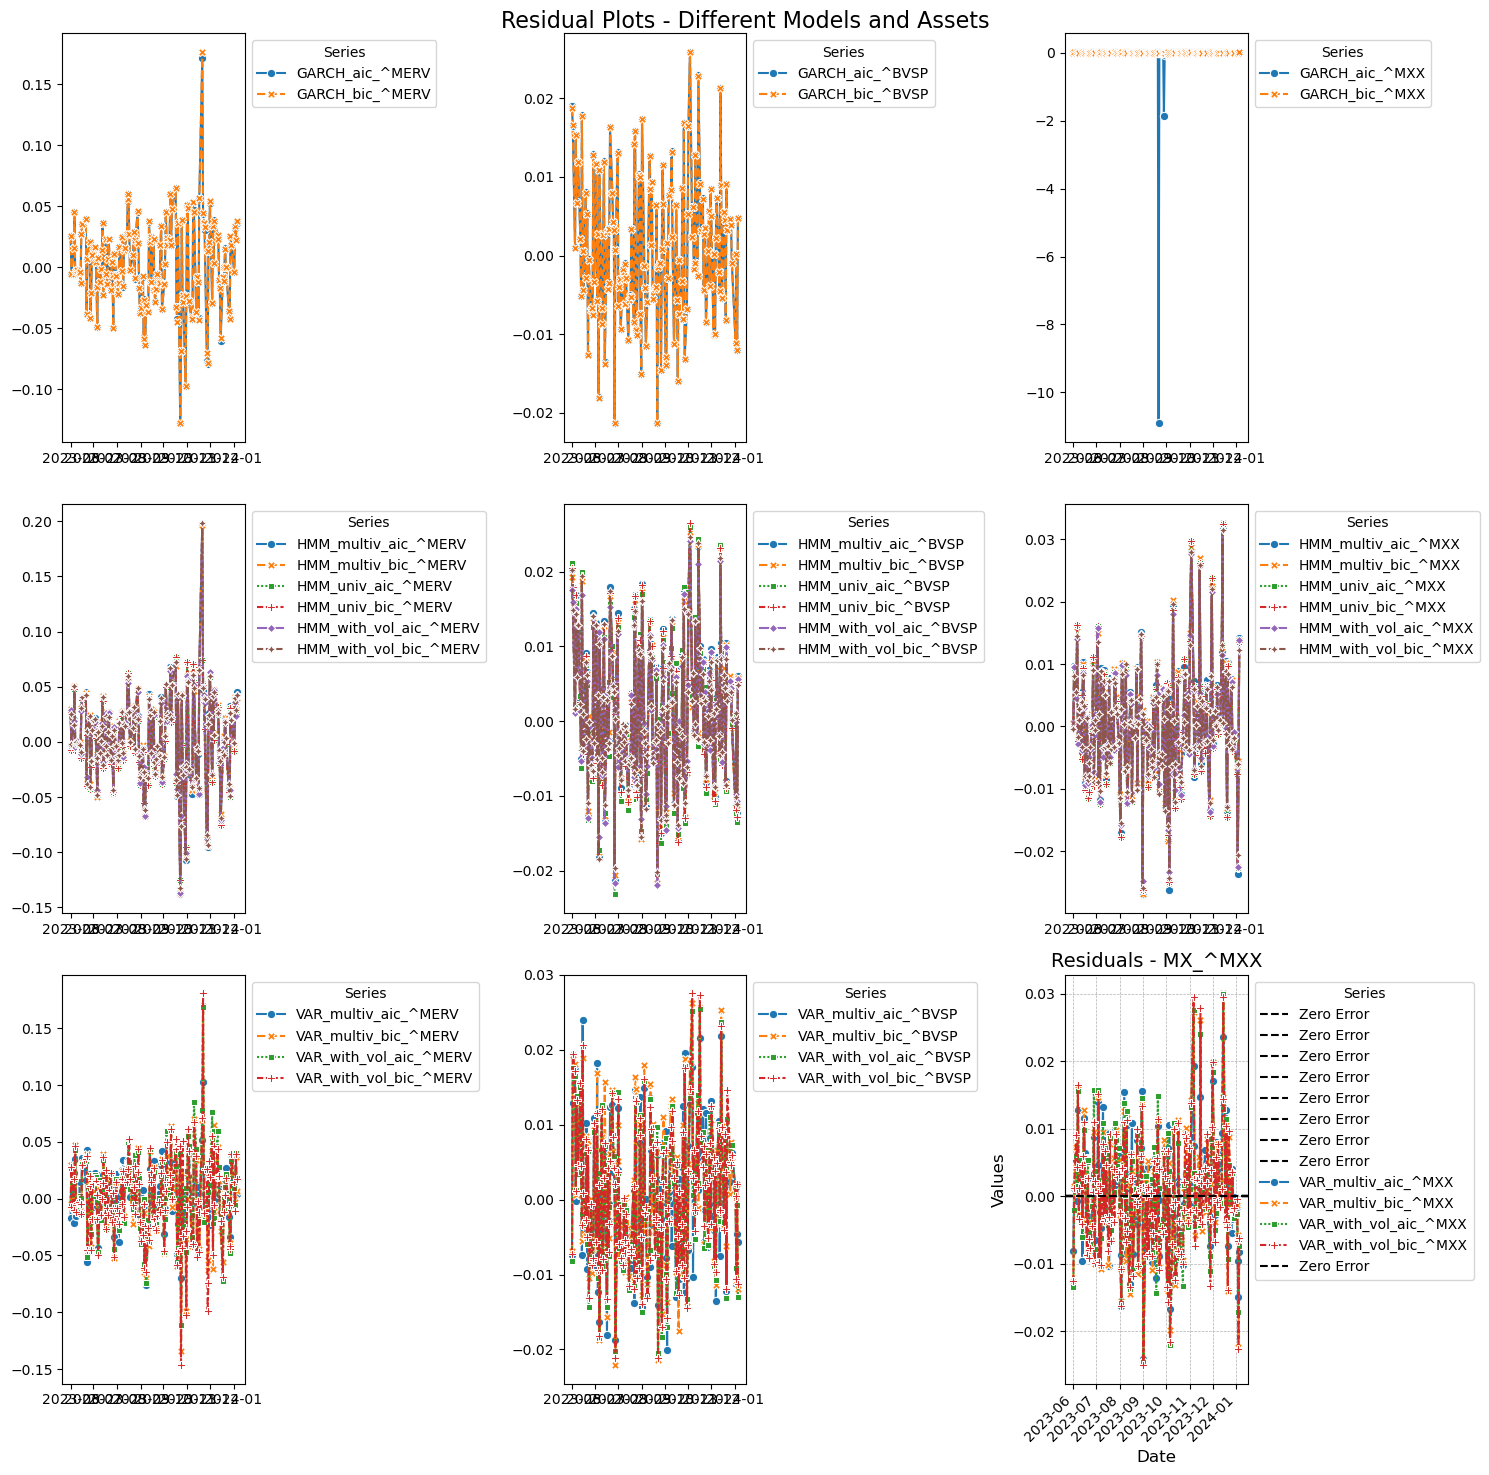

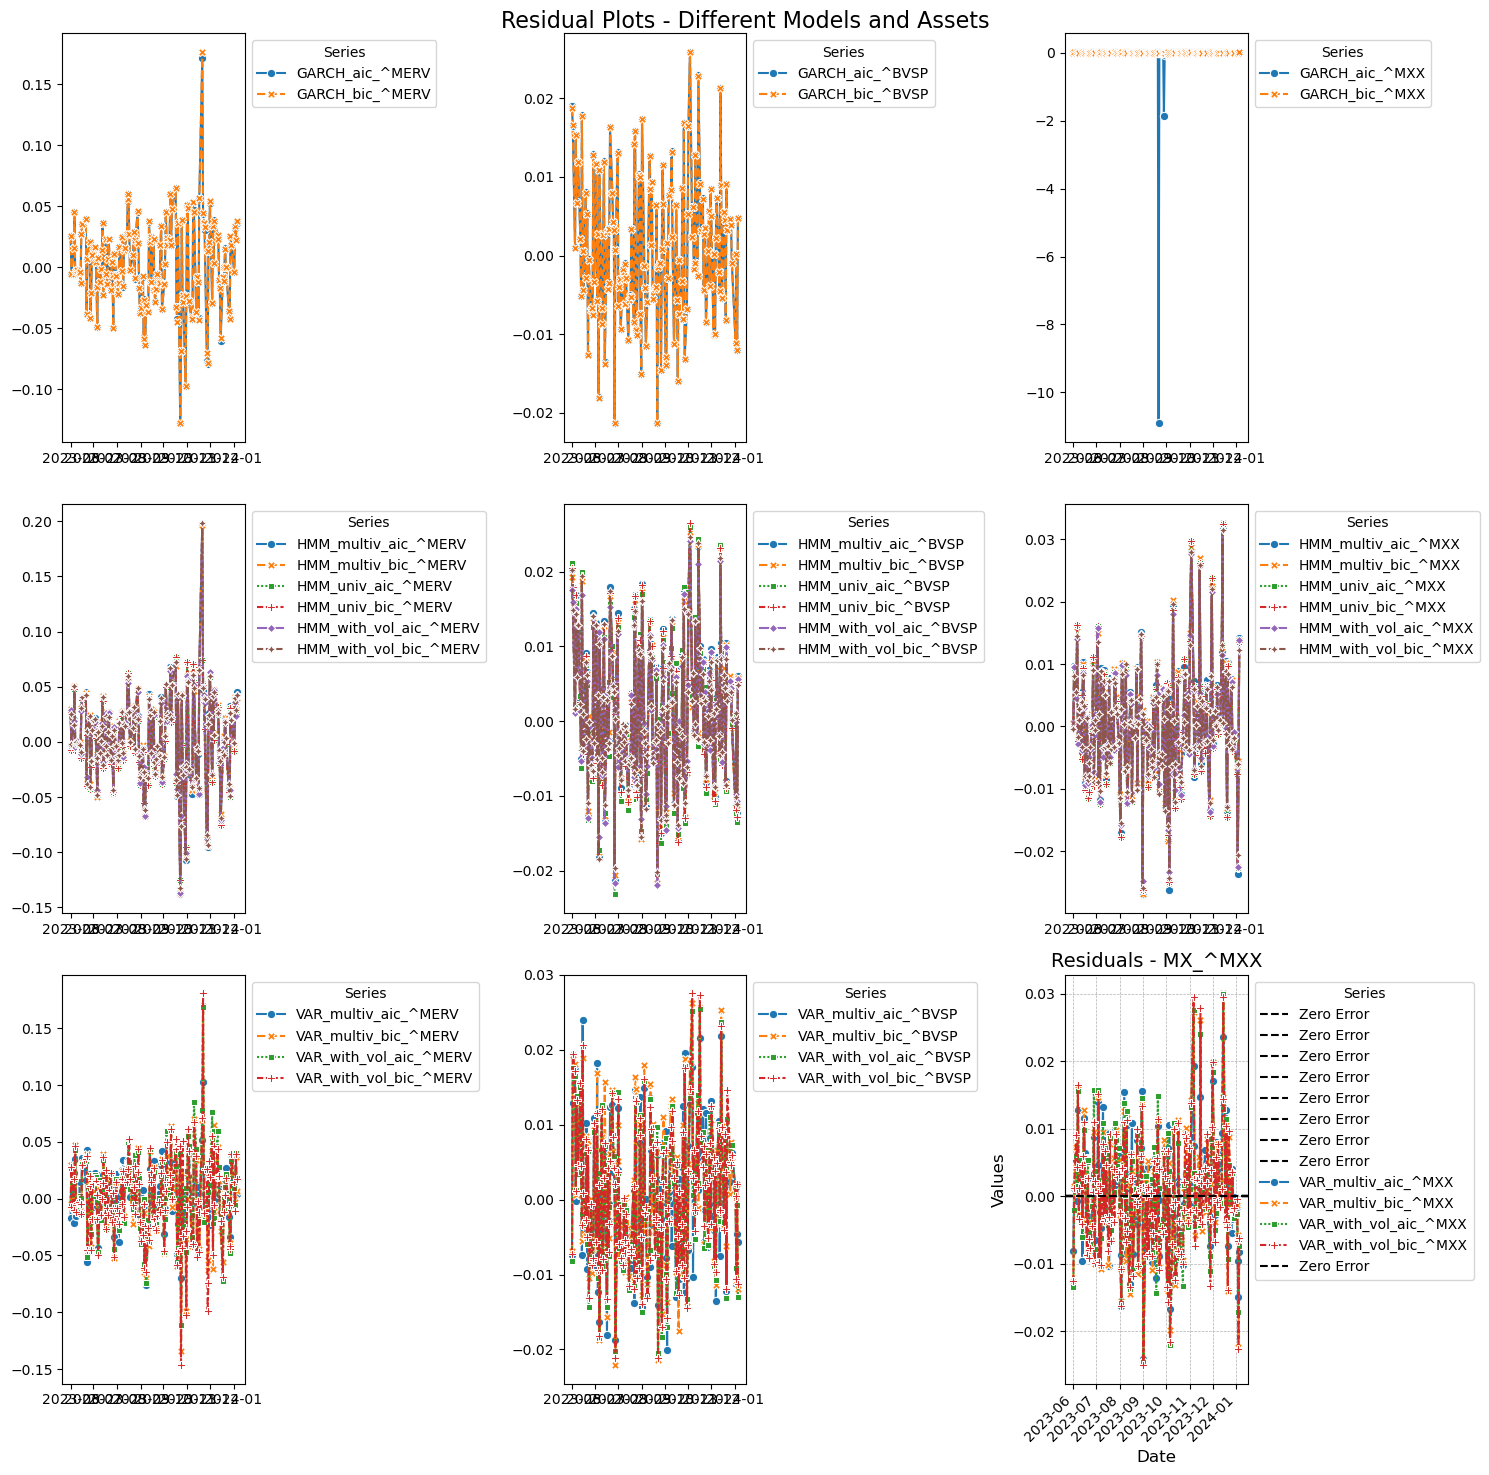

In [22]:
create_residual_grid(residuals)

In [81]:
forecasts_df = create_df_from_results_dict(all_forecasts, "forecasts")

GARCH_MX_^MXX_aic_best_forecasts.pickle
GARCH_MX_^MXX_bic_best_forecasts.pickle
HMM_multiv_MX_^MXX_aic_best_forecasts.pickle
HMM_multiv_MX_^MXX_bic_best_forecasts.pickle
HMM_univ_MX_^MXX_aic_best_forecasts.pickle
HMM_univ_MX_^MXX_bic_best_forecasts.pickle
HMM_with_vol_MX_^MXX_aic_best_forecasts.pickle
HMM_with_vol_MX_^MXX_bic_best_forecasts.pickle
VAR_multiv_MX_^MXX_aic_best_forecasts.pickle
VAR_multiv_MX_^MXX_bic_best_forecasts.pickle
VAR_with_vol_MX_^MXX_aic_best_forecasts.pickle
VAR_with_vol_MX_^MXX_bic_best_forecasts.pickle


In [82]:
forecasts_df = pd.concat([forecasts_df, subset_of_columns(df_test, "log_rets")])

In [83]:
residual_df = create_df_from_results_dict(all_residuals, "residuals")

GARCH_MX_^MXX_aic_best_residuals.pickle
GARCH_MX_^MXX_bic_best_residuals.pickle
HMM_multiv_MX_^MXX_aic_best_residuals.pickle
HMM_multiv_MX_^MXX_bic_best_residuals.pickle
HMM_univ_MX_^MXX_aic_best_residuals.pickle
HMM_univ_MX_^MXX_bic_best_residuals.pickle
HMM_with_vol_MX_^MXX_aic_best_residuals.pickle
HMM_with_vol_MX_^MXX_bic_best_residuals.pickle
VAR_multiv_MX_^MXX_aic_best_residuals.pickle
VAR_multiv_MX_^MXX_bic_best_residuals.pickle
VAR_with_vol_MX_^MXX_aic_best_residuals.pickle
VAR_with_vol_MX_^MXX_bic_best_residuals.pickle


In [84]:
lower_date=pd.to_datetime(params["start_test"])+pd.Timedelta(days=1)
higher_date=pd.to_datetime(params["end_test"])-pd.Timedelta(days=1)
residual_df=residual_df[lower_date:higher_date].copy()
df_test = df_test[lower_date:higher_date].copy()
residual_df.head()

GARCH_aic_MXX_USD  GARCH_aic_^MXX  GARCH_aic_WALMEX.MX  \
2023-06-01           0.005768       -0.000321            -0.008931   
2023-06-02           0.015292        0.009137             0.009946   
2023-06-05           0.002752        0.005273             0.031348   
2023-06-06           0.016629        0.015656             0.004601   
2023-06-07           0.004999       -0.002818             0.000373   

            GARCH_aic_WMMVY  GARCH_aic_GFNORTEO.MX  GARCH_aic_GBOOY  \
2023-06-01        -0.000455              -0.006442        -0.000996   
2023-06-02         0.011821              -0.003760         0.005749   
2023-06-05         0.035243               0.008285         0.006830   
2023-06-06         0.003258               0.024935         0.026333   
2023-06-07        -0.007392              -0.015147         0.007494   

            GARCH_aic_FEMSAUBD.MX  GARCH_aic_FMX  GARCH_aic_CEMEXCPO.MX  \
2023-06-01          -6.416799e-03       0.005480               0.001739   
2023-06-02          -2.183701e-02       0.009670               0.042994   
2023-06-05           9.155574e-03       0.010406               0.002936   
2023-06-06           2.249529e+07      -0.003372               0.038951   
2023-06-07           2.180298e-04       0.002447               0.022673   

            GARCH_aic_CX  GARCH_bic_MXX_USD  GARCH_bic_^MXX  \
2023-06-01      0.010282           0.005685       -0.000352   
2023-06-02      0.045195           0.015181        0.009014   
2023-06-05      0.003222           0.002674        0.005183   
2023-06-06      0.045894           0.016568        0.015532   
2023-06-07      0.019443           0.004929       -0.002814   

            GARCH_bic_WALMEX.MX  GARCH_bic_WMMVY  GARCH_bic_GFNORTEO.MX  \
2023-06-01             2.660298        -0.000328              -0.006442   
2023-06-02             0.009955         0.012668              -0.003760   
2023-06-05             0.032599         0.035243               0.008285   
2023-06-06             0.004793         0.003258               0.024935   
2023-06-07             0.000340        -0.007641              -0.015147   

            GARCH_bic_GBOOY  GARCH_bic_FEMSAUBD.MX  GARCH_bic_FMX  \
2023-06-01        -0.001194              -0.006415       0.005484   
2023-06-02         0.005753               0.009717       0.009681   
2023-06-05         0.006677               0.009154       0.010419   
2023-06-06         0.026310              -0.016984      -0.003383   
2023-06-07         0.007502               0.001834       0.002473   

            GARCH_bic_CEMEXCPO.MX  GARCH_bic_CX  HMM_multiv_aic_MXX_USD  \
2023-06-01               0.001739      0.010170                0.006842   
2023-06-02               0.042199      0.045310                0.017143   
2023-06-05               0.002894      0.003016                0.003067   
2023-06-06               0.038390      0.045555                0.018781   
2023-06-07               0.022322      0.019383                0.006234   

            HMM_multiv_aic_^MXX  HMM_multiv_aic_WALMEX.MX  \
2023-06-01            -0.000110                 -0.008284   
2023-06-02             0.009664                  0.007864   
2023-06-05             0.005752                  0.029214   
2023-06-06             0.016309                  0.004197   
2023-06-07            -0.002361                 -0.000236   

            HMM_multiv_aic_WMMVY  HMM_multiv_aic_GFNORTEO.MX  \
2023-06-01              0.000145                   -0.005359   
2023-06-02              0.012016                   -0.002864   
2023-06-05              0.035267                    0.008328   
2023-06-06              0.004087                    0.023707   
2023-06-07             -0.006457                   -0.013253   

            HMM_multiv_aic_GBOOY  HMM_multiv_aic_FEMSAUBD.MX  \
2023-06-01              0.000128                   -0.005102   
2023-06-02              0.006925                    0.010878   
2023-06-05              0.008090                    0.009011   
2023-06-0

In [85]:
# estadisticos de nans
((residual_df.isna().sum(axis=0) / len(residual_df.index)) * 100).nlargest(10)

GARCH_aic_MXX_USD        0.0
GARCH_aic_^MXX           0.0
GARCH_aic_WALMEX.MX      0.0
GARCH_aic_WMMVY          0.0
GARCH_aic_GFNORTEO.MX    0.0
GARCH_aic_GBOOY          0.0
GARCH_aic_FEMSAUBD.MX    0.0
GARCH_aic_FMX            0.0
GARCH_aic_CEMEXCPO.MX    0.0
GARCH_aic_CX             0.0
dtype: float64

In [86]:
# estadisticos de nans
((forecasts_df.isna().sum(axis=0) / len(forecasts_df.index)) * 100).nlargest(10)

GARCH_aic_MXX_USD        50.636943
GARCH_aic_^MXX           50.636943
GARCH_aic_WALMEX.MX      50.636943
GARCH_aic_WMMVY          50.636943
GARCH_aic_GFNORTEO.MX    50.636943
GARCH_aic_GBOOY          50.636943
GARCH_aic_FEMSAUBD.MX    50.636943
GARCH_aic_FMX            50.636943
GARCH_aic_CEMEXCPO.MX    50.636943
GARCH_aic_CX             50.636943
dtype: float64

## Separating in different stocks

In [87]:
def separate_by_stock(df:pd.DataFrame):
     stock_dict={}

     for stock in params["tickerlist"]:
          if params["local_suffix"] in stock:
               stock_dict[stock]= subset_of_columns(residual_df, stock)
          else:
               stock_dict[stock]= subset_of_columns(residual_df, stock, params["local_suffix"])    
     
     return stock_dict      

In [88]:
forecasts_by_stock=separate_by_stock(forecasts_df)
residuals_by_stock=separate_by_stock(residual_df)

In [89]:
for df_clean, name in zip([forecasts_by_stock, residuals_by_stock], ["forecasts", "residuals"]):
    bystockname = name + "_by_stock_" + params["tablename"] + ".pickle"
    with open(os.path.join(resultsroute, bystockname), "wb") as handle:
        pickle.dump(df_clean, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [90]:
def delete_in_column_names(df:pd.DataFrame, string:str):
    new_cols=[]
    for col in df.columns:
        col=col.replace(string, "")
        new_cols.append(col)
    df=df.set_axis(labels=new_cols, axis=1)
    return df

^MXX


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)
c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: invalid value encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


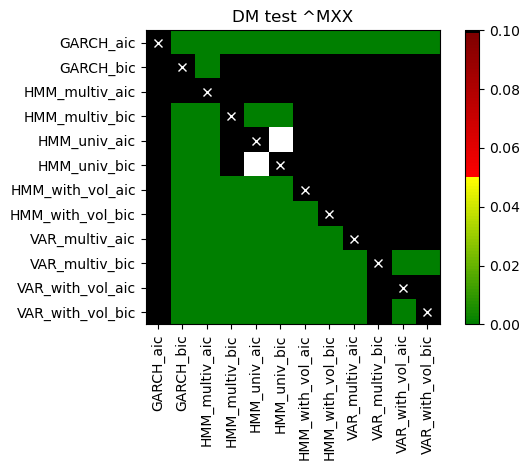

WALMEX.MX


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)
c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: invalid value encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


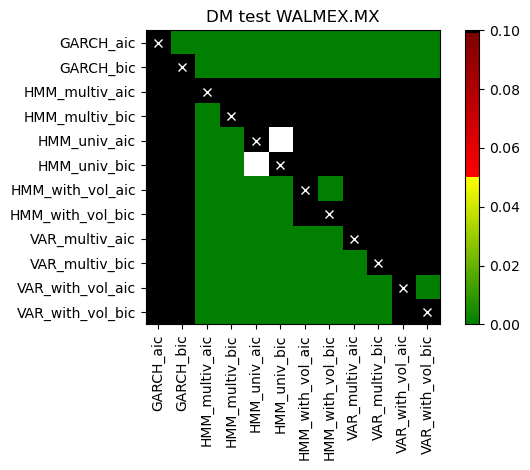

WMMVY


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)
c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: invalid value encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


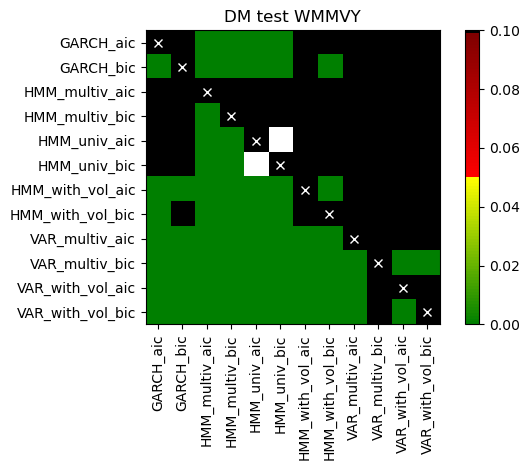

GFNORTEO.MX


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: invalid value encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)
c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


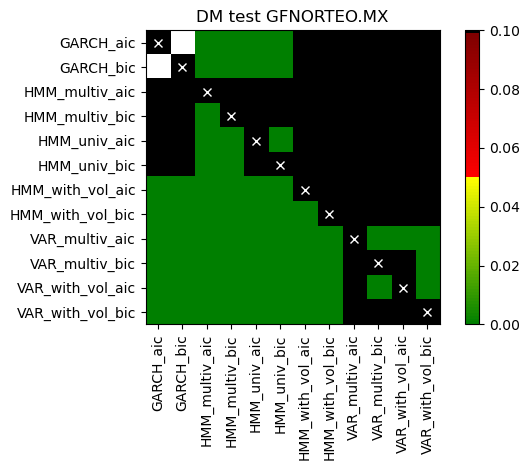

GBOOY


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)
c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: invalid value encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


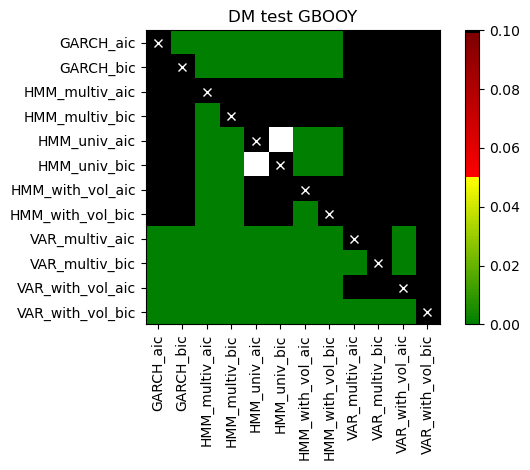

FEMSAUBD.MX


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)
c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: invalid value encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


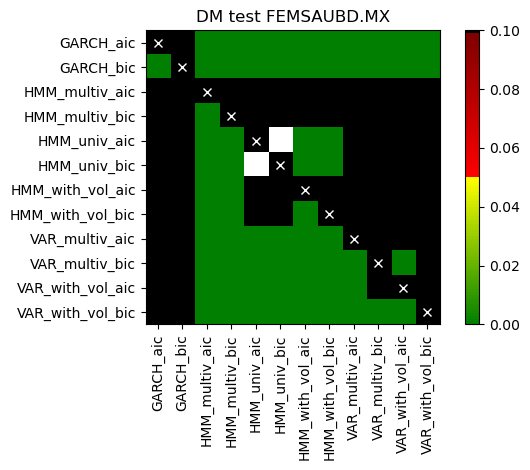

FMX


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)
c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: invalid value encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


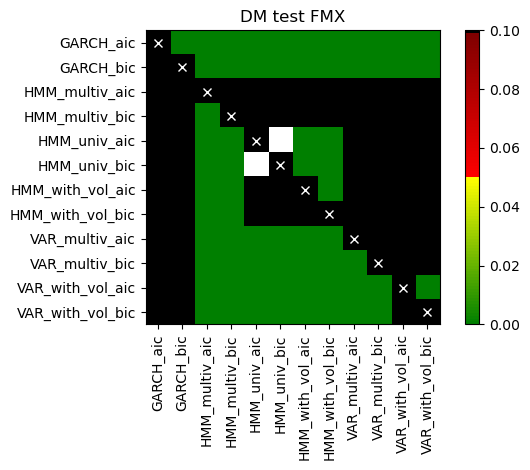

CEMEXCPO.MX


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


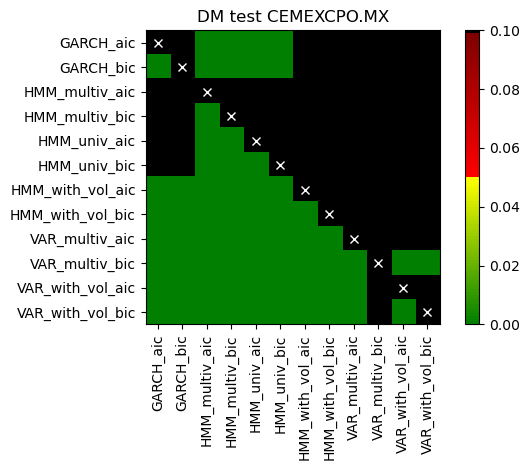

CX


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


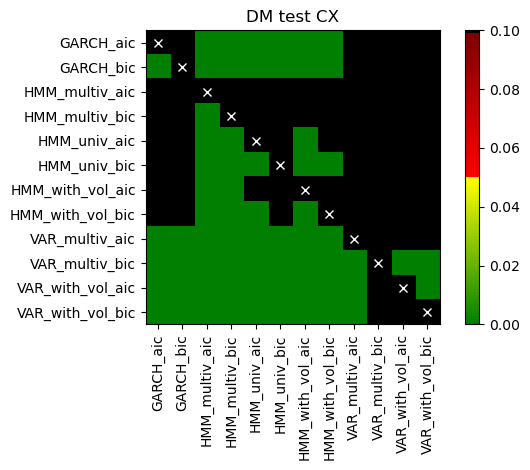

In [91]:
for stock in forecasts_by_stock.keys():
    print(stock)
    real_values=subset_of_columns(df_test, f"{stock}_log_rets")
    forecasts=delete_in_column_names(forecasts_by_stock[stock].fillna(0), f"_{stock}")   

    plot_multivariate_DM_test(real_price=real_values, 
                            forecasts=forecasts.fillna(0), 
                            title=f"DM test {stock}",
                            savefig=True,
                            path=dmroute)

In [92]:
best_models_by_stock={stock:None for stock in residuals_by_stock.keys()}

for stock, dataframe in residuals_by_stock.items():
    dataframe = delete_in_column_names(dataframe, f"_{stock}")
    metrics_df = pd.DataFrame(index=["mse", "meanabs", "medianabs"])

    for column in dataframe.columns:
        single_model=pd.DataFrame(dataframe[column])
        
        metrics_df.loc["mse", column] = (
            (single_model**2).mean().mean()
        )
        metrics_df.loc["meanabs", column] = (
            single_model.abs().mean().mean()
        )
        metrics_df.loc["medianabs", column] = (
            (single_model.abs()).median().median()
        )
    metrics_df = metrics_df * 100
    metrics_df = subset_of_columns(metrics_df, substring="", exclude="USD")
    
    best_dict={}
    for criterion in metrics_df.index:
        best_dict[criterion] = metrics_df.iloc[metrics_df.index==criterion].idxmin(axis="columns").values[0]
        
    best_models_by_stock[stock]= (metrics_df, best_dict)

In [93]:
print(params["tickerlist"][0])
best_models_by_stock[params["tickerlist"][0]][1]

^MXX


{'mse': 'VAR_multiv_aic',
 'meanabs': 'VAR_multiv_aic',
 'medianabs': 'VAR_multiv_aic'}

In [94]:
best_models_by_stock[params["tickerlist"][0]][0]

GARCH_aic  GARCH_bic  HMM_multiv_aic  HMM_multiv_bic  HMM_univ_aic  \
mse        80.575441   0.008761        0.008562        0.008200      0.008685   
meanabs     9.138667   0.709581        0.705022        0.674079      0.709446   
medianabs   0.574244   0.584554        0.563449        0.516597      0.590149   

           HMM_univ_bic  HMM_with_vol_aic  HMM_with_vol_bic  VAR_multiv_aic  \
mse            0.008685          0.007491          0.007474        0.005900   
meanabs        0.709446          0.645197          0.643113        0.603494   
medianabs      0.590149          0.522079          0.489152        0.474569   

           VAR_multiv_bic  VAR_with_vol_aic  VAR_with_vol_bic  
mse              0.007776          0.007221          0.008030  
meanabs          0.685076          0.642844          0.690120  
medianabs        0.537707          0.494502          0.563937

In [95]:
best_models_by_stock[params["tickerlist"][0]][0].rank(axis=1)

GARCH_aic  GARCH_bic  HMM_multiv_aic  HMM_multiv_bic  HMM_univ_aic  \
mse             12.0       11.0             8.0             7.0           9.5   
meanabs         12.0       11.0             8.0             5.0           9.5   
medianabs        9.0       10.0             7.0             4.0          11.5   

           HMM_univ_bic  HMM_with_vol_aic  HMM_with_vol_bic  VAR_multiv_aic  \
mse                 9.5               4.0               3.0             1.0   
meanabs             9.5               4.0               3.0             1.0   
medianabs          11.5               5.0               2.0             1.0   

           VAR_multiv_bic  VAR_with_vol_aic  VAR_with_vol_bic  
mse                   5.0               2.0               6.0  
meanabs               6.0               2.0               7.0  
medianabs             6.0               3.0               8.0

In [96]:
agg_df=(pd.DataFrame().reindex_like(best_models_by_stock[params["tickerlist"][0]][0]))

for asset in params["tickerlist"]:
    ranks = best_models_by_stock[asset][0].rank(axis=1)
    agg_df = agg_df.add(ranks, fill_value=0)
agg_df = agg_df/len(params["tickerlist"])
    
agg_df=agg_df.rank(axis=1, method="average").astype(int)
agg_df

GARCH_aic  GARCH_bic  HMM_multiv_aic  HMM_multiv_bic  HMM_univ_aic  \
mse               10         12              11               9             7   
meanabs           11         12              10               6             7   
medianabs         10         12               6               3             8   

           HMM_univ_bic  HMM_with_vol_aic  HMM_with_vol_bic  VAR_multiv_aic  \
mse                   8                 2                 3               1   
meanabs               8                 2                 2               1   
medianabs             9                 2                 1               4   

           VAR_multiv_bic  VAR_with_vol_aic  VAR_with_vol_bic  
mse                     5                 4                 6  
meanabs                 9                 4                 5  
medianabs              11                 4                 7

In [97]:
agg_df.to_csv(os.path.join(resultsroute, f"""aggregate_results_df_{params["tablename"]}.csv"""))

In [98]:
agg_df.to_clipboard()

In [99]:
criterion="mse"
print(f"Best overall performance by {criterion}")
agg_df.T.nsmallest(3, f"{criterion}").index.to_list()

Best overall performance by mse


['VAR_multiv_aic', 'HMM_with_vol_aic', 'HMM_with_vol_bic']